In [2]:
##Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
##Import csv file

df_index=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df=df_index

In [4]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df=df.dropna().reset_index(drop=True)
df=df.drop(122).reset_index(drop=True)
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [8]:
df=df.drop(columns=['day','month','year'],axis=1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [9]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
239,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [10]:
df.iloc[[122]]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    object 
 1    RH          243 non-null    object 
 2    Ws          243 non-null    object 
 3   Rain         243 non-null    object 
 4   FFMC         243 non-null    object 
 5   DMC          243 non-null    object 
 6   DC           243 non-null    object 
 7   ISI          243 non-null    object 
 8   BUI          243 non-null    object 
 9   FWI          243 non-null    object 
 10  Classes      243 non-null    object 
 11  Region       243 non-null    float64
dtypes: float64(1), object(11)
memory usage: 22.9+ KB


In [12]:
df[['Region']]=df[['Region']].astype(int)

In [13]:
## fix spaces in columns names
df.columns=df.columns.str.strip()
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
df['RH'].unique()

array(['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65',
       '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50',
       '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51',
       '52', '58', '86', '74', '71', '49', '44', '41', '42', '90', '87',
       '72', '46', '37', '36', '56', '43', '83', '29', '34', '33', '35',
       '39', '31', '21', '40', '24', '38', '26'], dtype=object)

In [15]:
df[['Temperature','RH','Ws']]=df[['Temperature','RH','Ws']].astype(int)

In [16]:
object=[feature for feature in df.columns if df[feature].dtypes=='O']

In [17]:
for i in object:
    if i!='Classes':
        df[i]=df[i].astype(float)
       

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [19]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [20]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [21]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [22]:
perc=df['Classes'].value_counts(normalize=True)*100
perc

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

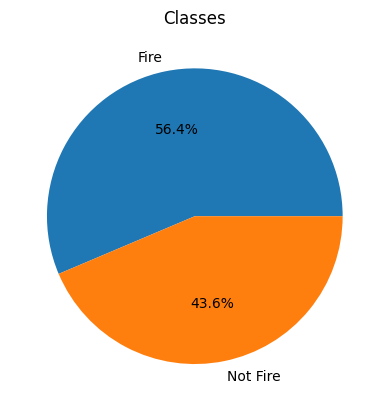

In [23]:
classlabel=['Fire','Not Fire']
plt.pie(perc,labels=classlabel,autopct='%1.1f%%')
plt.title('Classes')
plt.show()

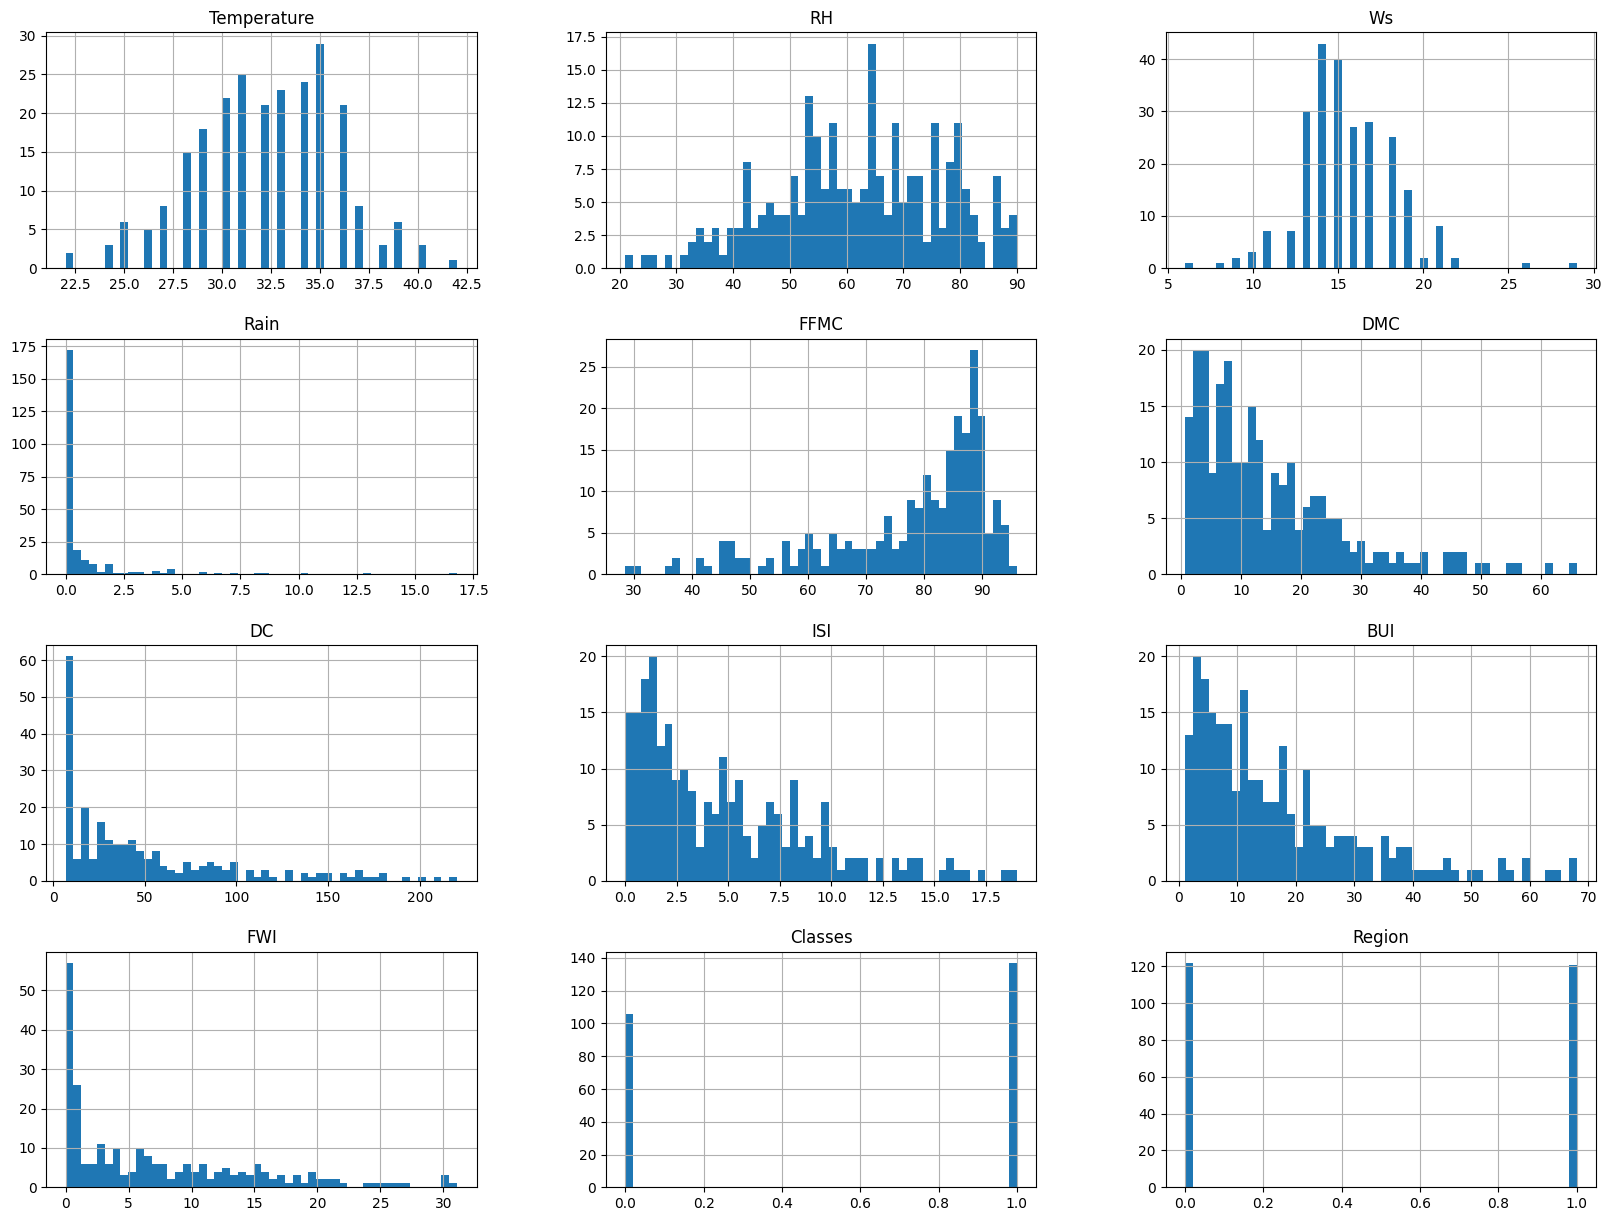

In [24]:
## Plot desnity plot for all features

df.hist(bins=50,figsize=(20,15))
plt.show()

In [25]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

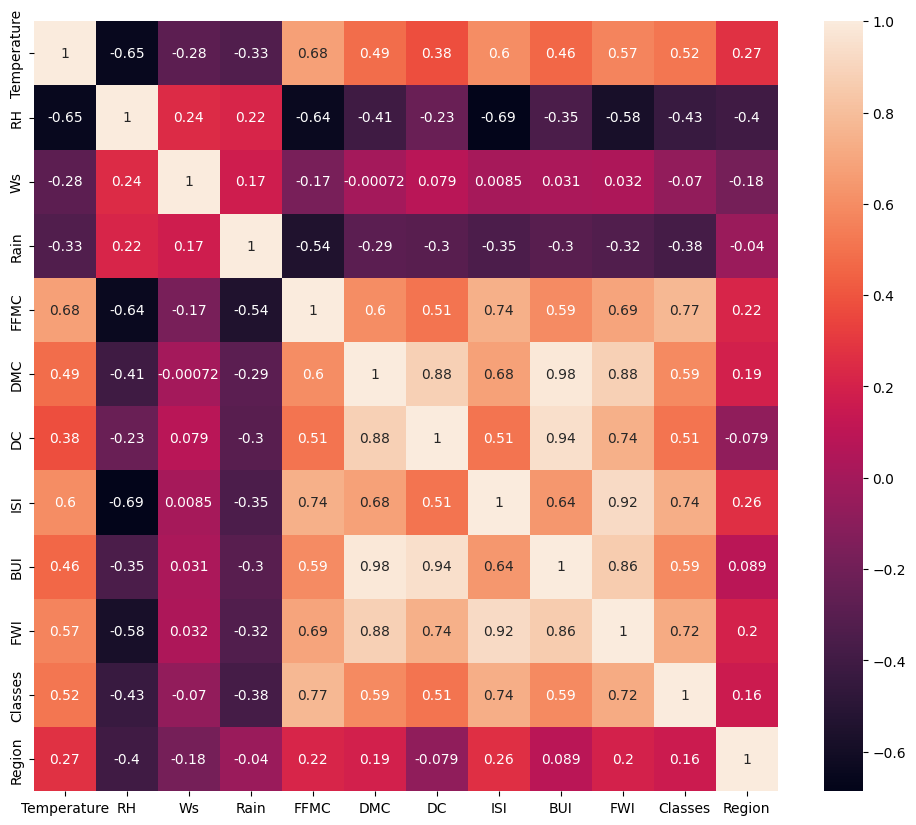

In [26]:
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

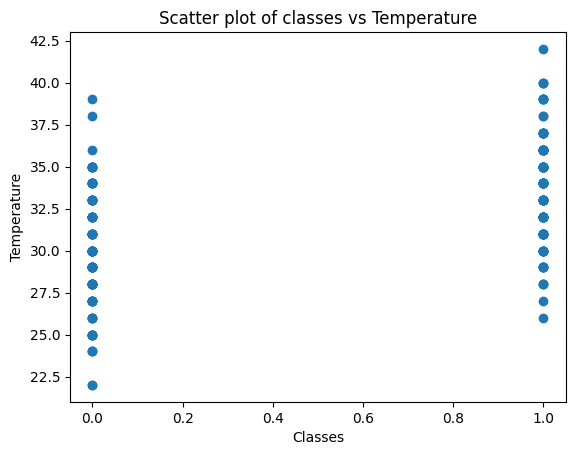

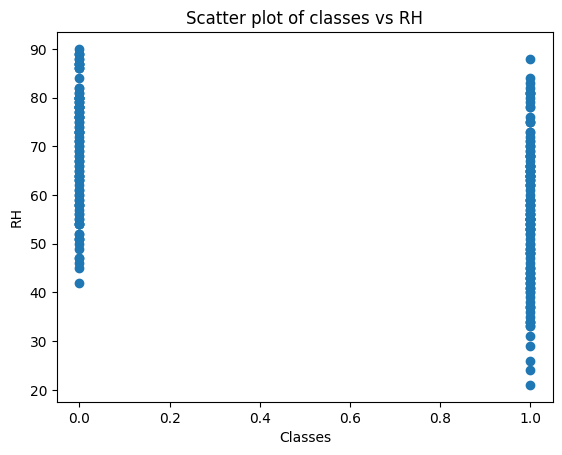

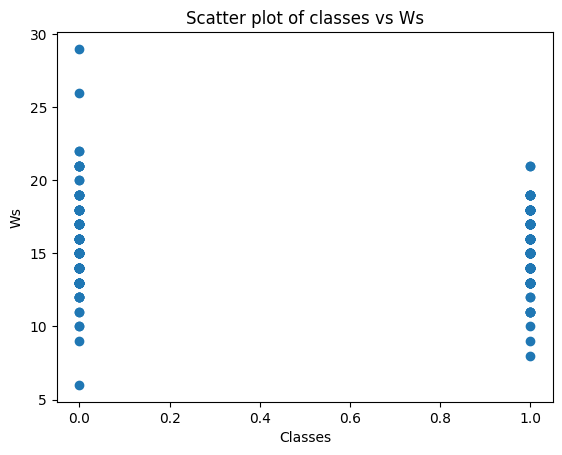

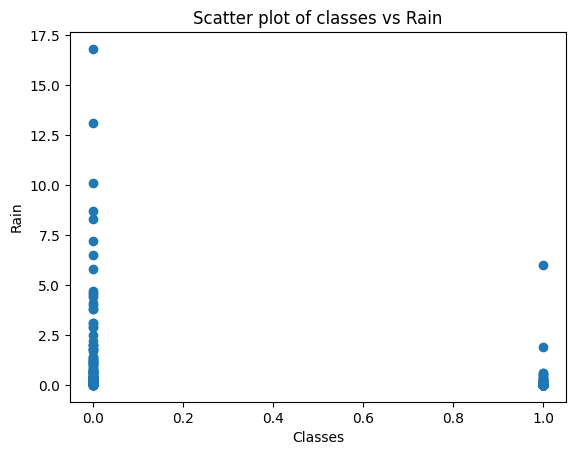

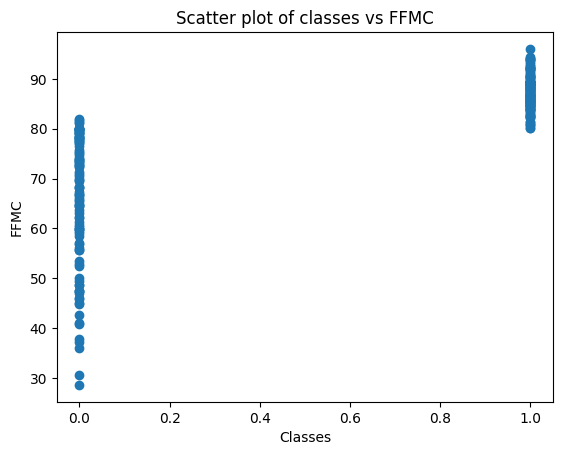

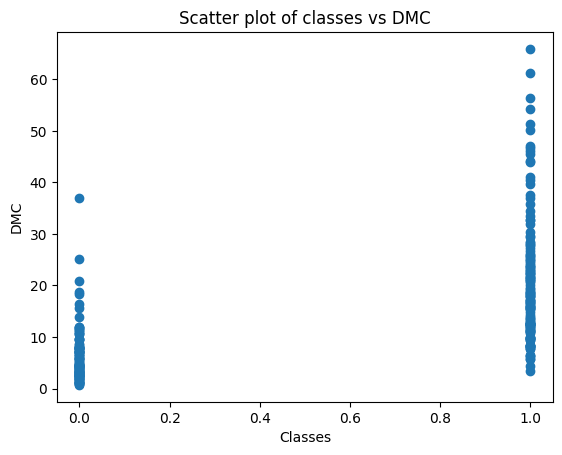

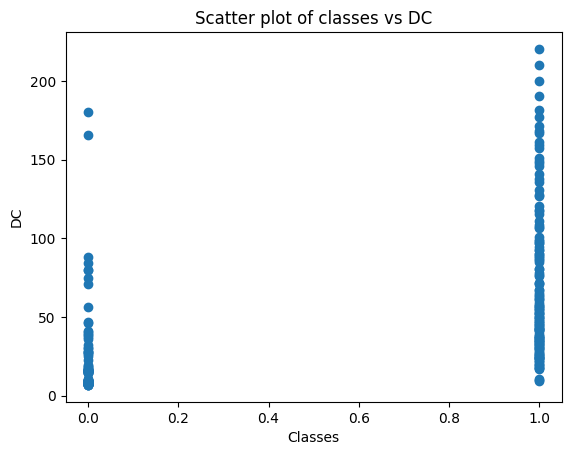

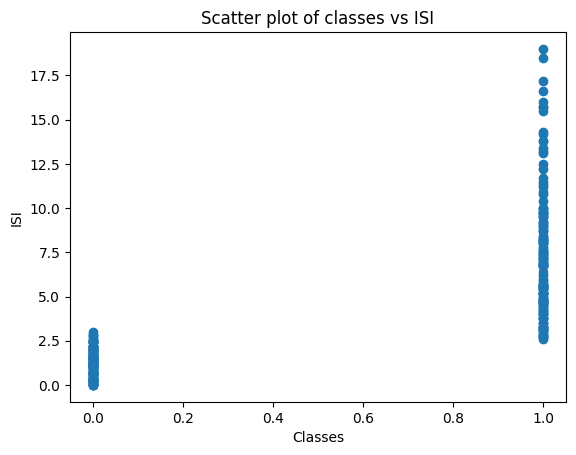

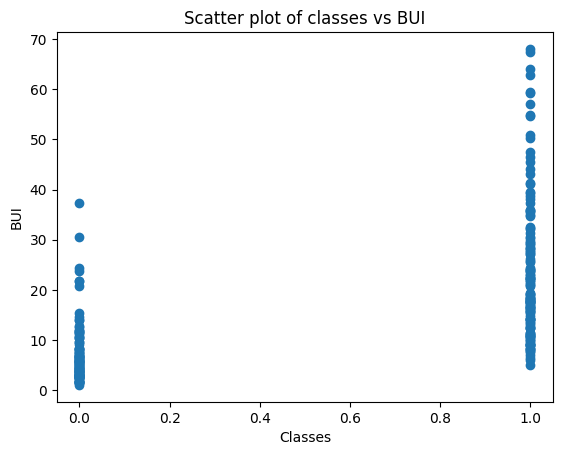

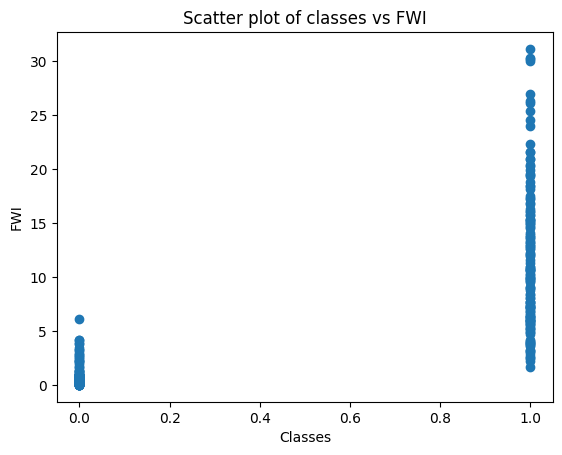

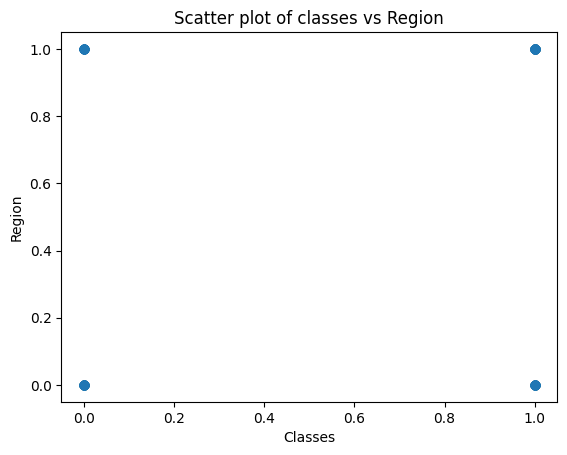

In [27]:
for i in df.columns:
    if i!='Classes':
        plt.figure()  ##create a nre figure for each plot
        plt.scatter(df['Classes'],df[i])
        plt.title(f'Scatter plot of classes vs {i}')
        plt.xlabel('Classes')
        plt.ylabel(i)
        

In [28]:
df['Region']

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    1
240    1
241    1
242    1
Name: Region, Length: 243, dtype: int64

In [29]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [30]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [31]:
## Independent And dependent features
X=df[['ISI','FFMC']]
y=df['Classes']


In [32]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [33]:
## threshold--Domain expertise
corr_features=correlation(X_train, 0.85)
corr_features

set()

## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression

logistic=LogisticRegression()
logistic.fit(X_train_scaled,y_train)
y_pred=logistic.predict(X_test_scaled)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

score=accuracy_score(y_test,y_pred)
print('Accuracy',score)
conm=confusion_matrix(y_test,y_pred)
print('Confustion metrix \n',conm)
clas=classification_report(y_test,y_pred)
print('Classification report\n',clas)

Accuracy 0.9836065573770492
Confustion metrix 
 [[24  0]
 [ 1 36]]
Classification report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.99        37

    accuracy                           0.98        61
   macro avg       0.98      0.99      0.98        61
weighted avg       0.98      0.98      0.98        61



**Hyper parameter turning**

In [37]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1,2,3,4,5,6,7,8,9,10]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [38]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [39]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [40]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [41]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                               2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [42]:

grid.fit(X_train_scaled,y_train)

/home/sandy/Python/Learning ML/Forest_fire/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sandy/Python/Learning ML/Forest_fire/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sandy/Python/Learning ML/Forest_fire/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sandy/Python/Learning ML/Forest_fire/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sandy/Python/Learning ML/Forest_fire/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                               2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [43]:

grid.best_params_

{'C': 0.2, 'penalty': 'l1', 'solver': 'liblinear'}

In [44]:

grid.best_score_

np.float64(0.9834834834834835)

In [45]:
y_pred=grid.predict(X_test_scaled)


In [46]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9672131147540983
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.97      0.97      0.97        37

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

[[23  1]
 [ 1 36]]


**Randomize SerchCV**

In [47]:
from sklearn.model_selection import RandomizedSearchCV
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [48]:

randomcv.fit(X_train_scaled,y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8,
                                              9, 10],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [49]:
randomcv.best_score_

np.float64(0.9834834834834835)

In [50]:
randomcv.best_params_


{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.4}

In [51]:
y_pred=randomcv.predict(X_test_scaled)

In [52]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9672131147540983
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.97      0.97      0.97        37

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

[[23  1]
 [ 1 36]]


In [53]:
import pickle
pickle.dump(logistic,open('logistic.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))